In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

df = pd.read_csv('KO.csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050381,0.051752,0.050381,0.050381,806400,0.0,0.0
1,1962-01-03,0.049632,0.049632,0.048510,0.049258,1574400,0.0,0.0
2,1962-01-04,0.049383,0.050006,0.049383,0.049632,844800,0.0,0.0
3,1962-01-05,0.049632,0.050256,0.048385,0.048510,1420800,0.0,0.0
4,1962-01-08,0.048136,0.048136,0.047076,0.048011,2035200,0.0,0.0
...,...,...,...,...,...,...,...,...
15231,2022-07-06,63.599998,64.089996,63.189999,63.410000,13450500,0.0,0.0
15232,2022-07-07,63.259998,63.580002,62.700001,62.910000,14828400,0.0,0.0
15233,2022-07-08,63.029999,63.419998,62.880001,63.139999,11308900,0.0,0.0
15234,2022-07-11,62.990002,63.459999,62.590000,62.939999,12702100,0.0,0.0


In [53]:
df.info

<bound method DataFrame.info of              Date       Open       High        Low      Close    Volume  \
0      1962-01-02   0.050381   0.051752   0.050381   0.050381    806400   
1      1962-01-03   0.049632   0.049632   0.048510   0.049258   1574400   
2      1962-01-04   0.049383   0.050006   0.049383   0.049632    844800   
3      1962-01-05   0.049632   0.050256   0.048385   0.048510   1420800   
4      1962-01-08   0.048136   0.048136   0.047076   0.048011   2035200   
...           ...        ...        ...        ...        ...       ...   
15231  2022-07-06  63.599998  64.089996  63.189999  63.410000  13450500   
15232  2022-07-07  63.259998  63.580002  62.700001  62.910000  14828400   
15233  2022-07-08  63.029999  63.419998  62.880001  63.139999  11308900   
15234  2022-07-11  62.990002  63.459999  62.590000  62.939999  12702100   
15235  2022-07-12  63.000000  63.450001  62.470001  62.669998  14730800   

       Dividends  Stock Splits  
0            0.0           0.0  
1

In [54]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [55]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15236.000000,15236.000000,15236.000000,15236.000000,1.523600e+04,15236.000000,15236.000000
mean,11.658086,11.750886,11.564159,11.661078,9.118472e+06,0.001657,0.001116
std,14.775260,14.881195,14.668572,14.777277,7.966681e+06,0.021057,0.049268
min,0.037424,0.037551,0.035144,0.037298,7.680000e+04,0.000000,0.000000
25%,0.239607,0.241615,0.237431,0.239623,2.866050e+06,0.000000,0.000000
50%,4.914813,4.957846,4.863504,4.915897,7.676700e+06,0.000000,0.000000
75%,17.324689,17.543921,17.113819,17.345121,1.302580e+07,0.000000,0.000000
max,66.519405,66.717967,65.248586,65.735069,1.241690e+08,0.440000,3.000000


In [56]:
df.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999956,0.999945,0.999910,0.460629,0.096278,-0.008852
High,0.999956,1.000000,0.999925,0.999954,0.461891,0.095903,-0.008920
Low,0.999945,0.999925,1.000000,0.999955,0.458730,0.095829,-0.008911
Close,0.999910,0.999954,0.999955,1.000000,0.460215,0.095725,-0.008882
Volume,0.460629,0.461891,0.458730,0.460215,1.000000,0.058969,-0.000375
Dividends,0.096278,0.095903,0.095829,0.095725,0.058969,1.000000,-0.001783
Stock Splits,-0.008852,-0.008920,-0.008911,-0.008882,-0.000375,-0.001783,1.000000


In [57]:
df.duplicated().sum()

0

<AxesSubplot:>

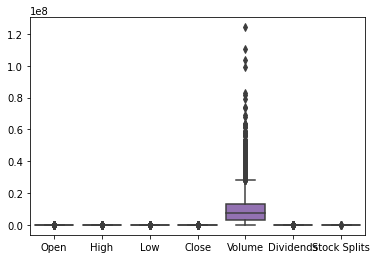

In [58]:
sns.boxplot(data=df)

In [75]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

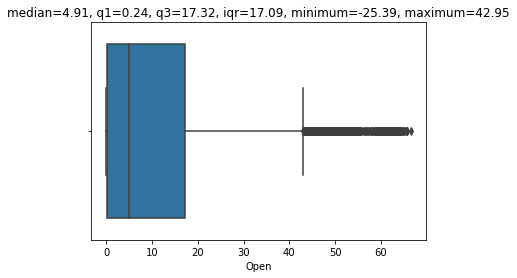

'Open' has 799 outliers


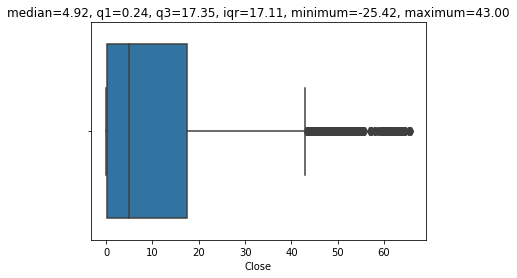

'Close' has 799 outliers


In [76]:
#Detect Outliers
box_and_whisker(df, 'Open')
print(f"'Open' has {count_outliers(df, 'Open')} outliers")
box_and_whisker(df, 'Close')
print(f"'Close' has {count_outliers(df, 'Close')} outliers")

rows before removing: 15236
rows after removing: 14437


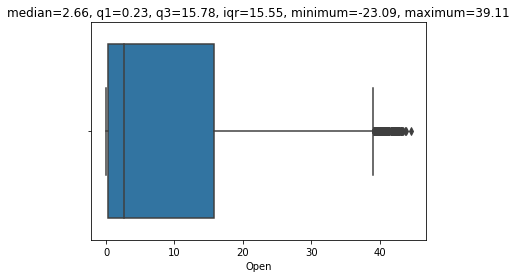

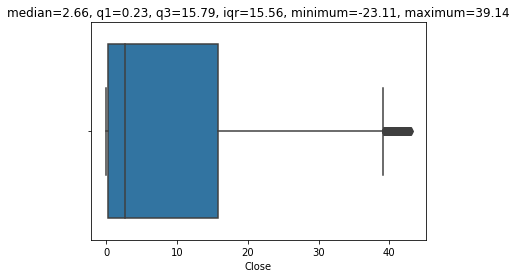

In [77]:
#Remove the outliers
print(f"rows before removing: {df.shape[0]}")
dfR = remove_outliers(df, 'Open')
dfR = remove_outliers(df, 'Close')
print(f"rows after removing: {dfR.shape[0]}")

box_and_whisker(dfR, 'Open')
box_and_whisker(dfR, 'Close')


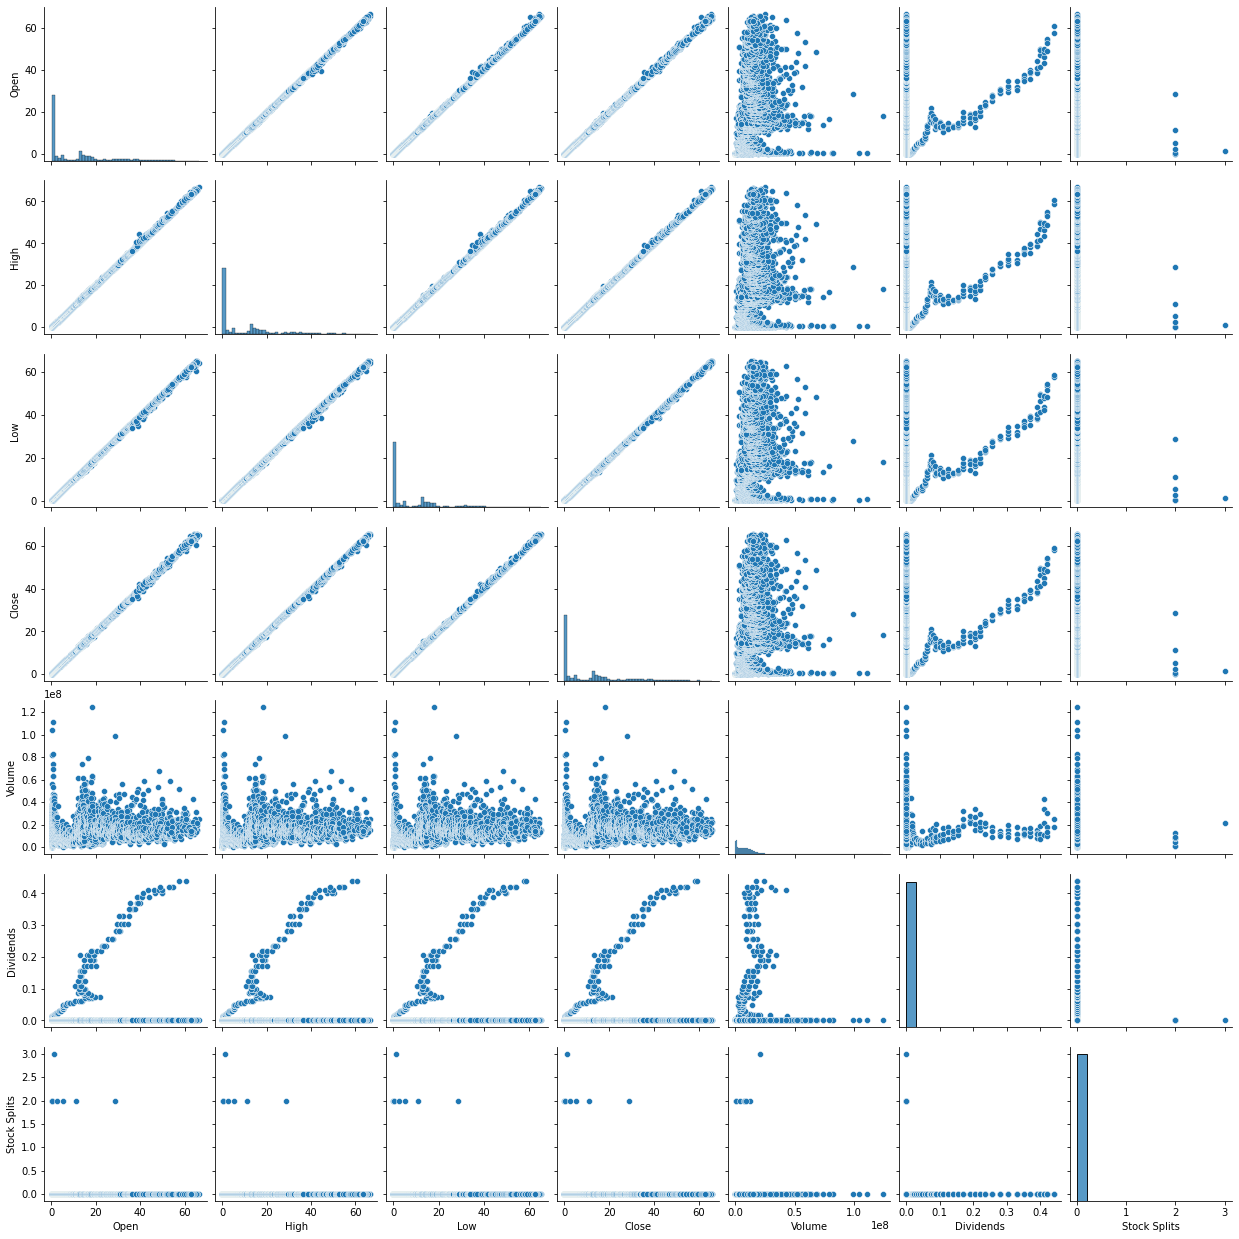

In [79]:
sns.pairplot(df)

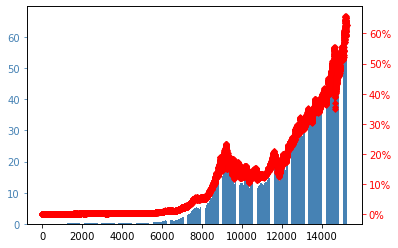

In [80]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df.index, df['Open'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df.index, df['Close'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

In [81]:
df.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999956,0.999945,0.999910,0.460629,0.096278,-0.008852
High,0.999956,1.000000,0.999925,0.999954,0.461891,0.095903,-0.008920
Low,0.999945,0.999925,1.000000,0.999955,0.458730,0.095829,-0.008911
Close,0.999910,0.999954,0.999955,1.000000,0.460215,0.095725,-0.008882
Volume,0.460629,0.461891,0.458730,0.460215,1.000000,0.058969,-0.000375
Dividends,0.096278,0.095903,0.095829,0.095725,0.058969,1.000000,-0.001783
Stock Splits,-0.008852,-0.008920,-0.008911,-0.008882,-0.000375,-0.001783,1.000000


In [146]:
def visualize_KO_stock_prices(dfR):

    fig, axes = plt.subplots(1,1,figsize = (30, 30))
    

    axes.set_facecolor('black')
    axes.plot(dfR['Date'], dfR['Close'])
    axes.set_title("Coca-cola's Stock Price", fontsize = 30)
    axes.set_xlabel('Time', fontsize = 25)
    axes.set_ylabel('Closing Price', fontsize = 25)
    axes.xaxis.set_tick_params(labelsize = 18)
    axes.yaxis.set_tick_params(labelsize = 18)
    
    plt.show()

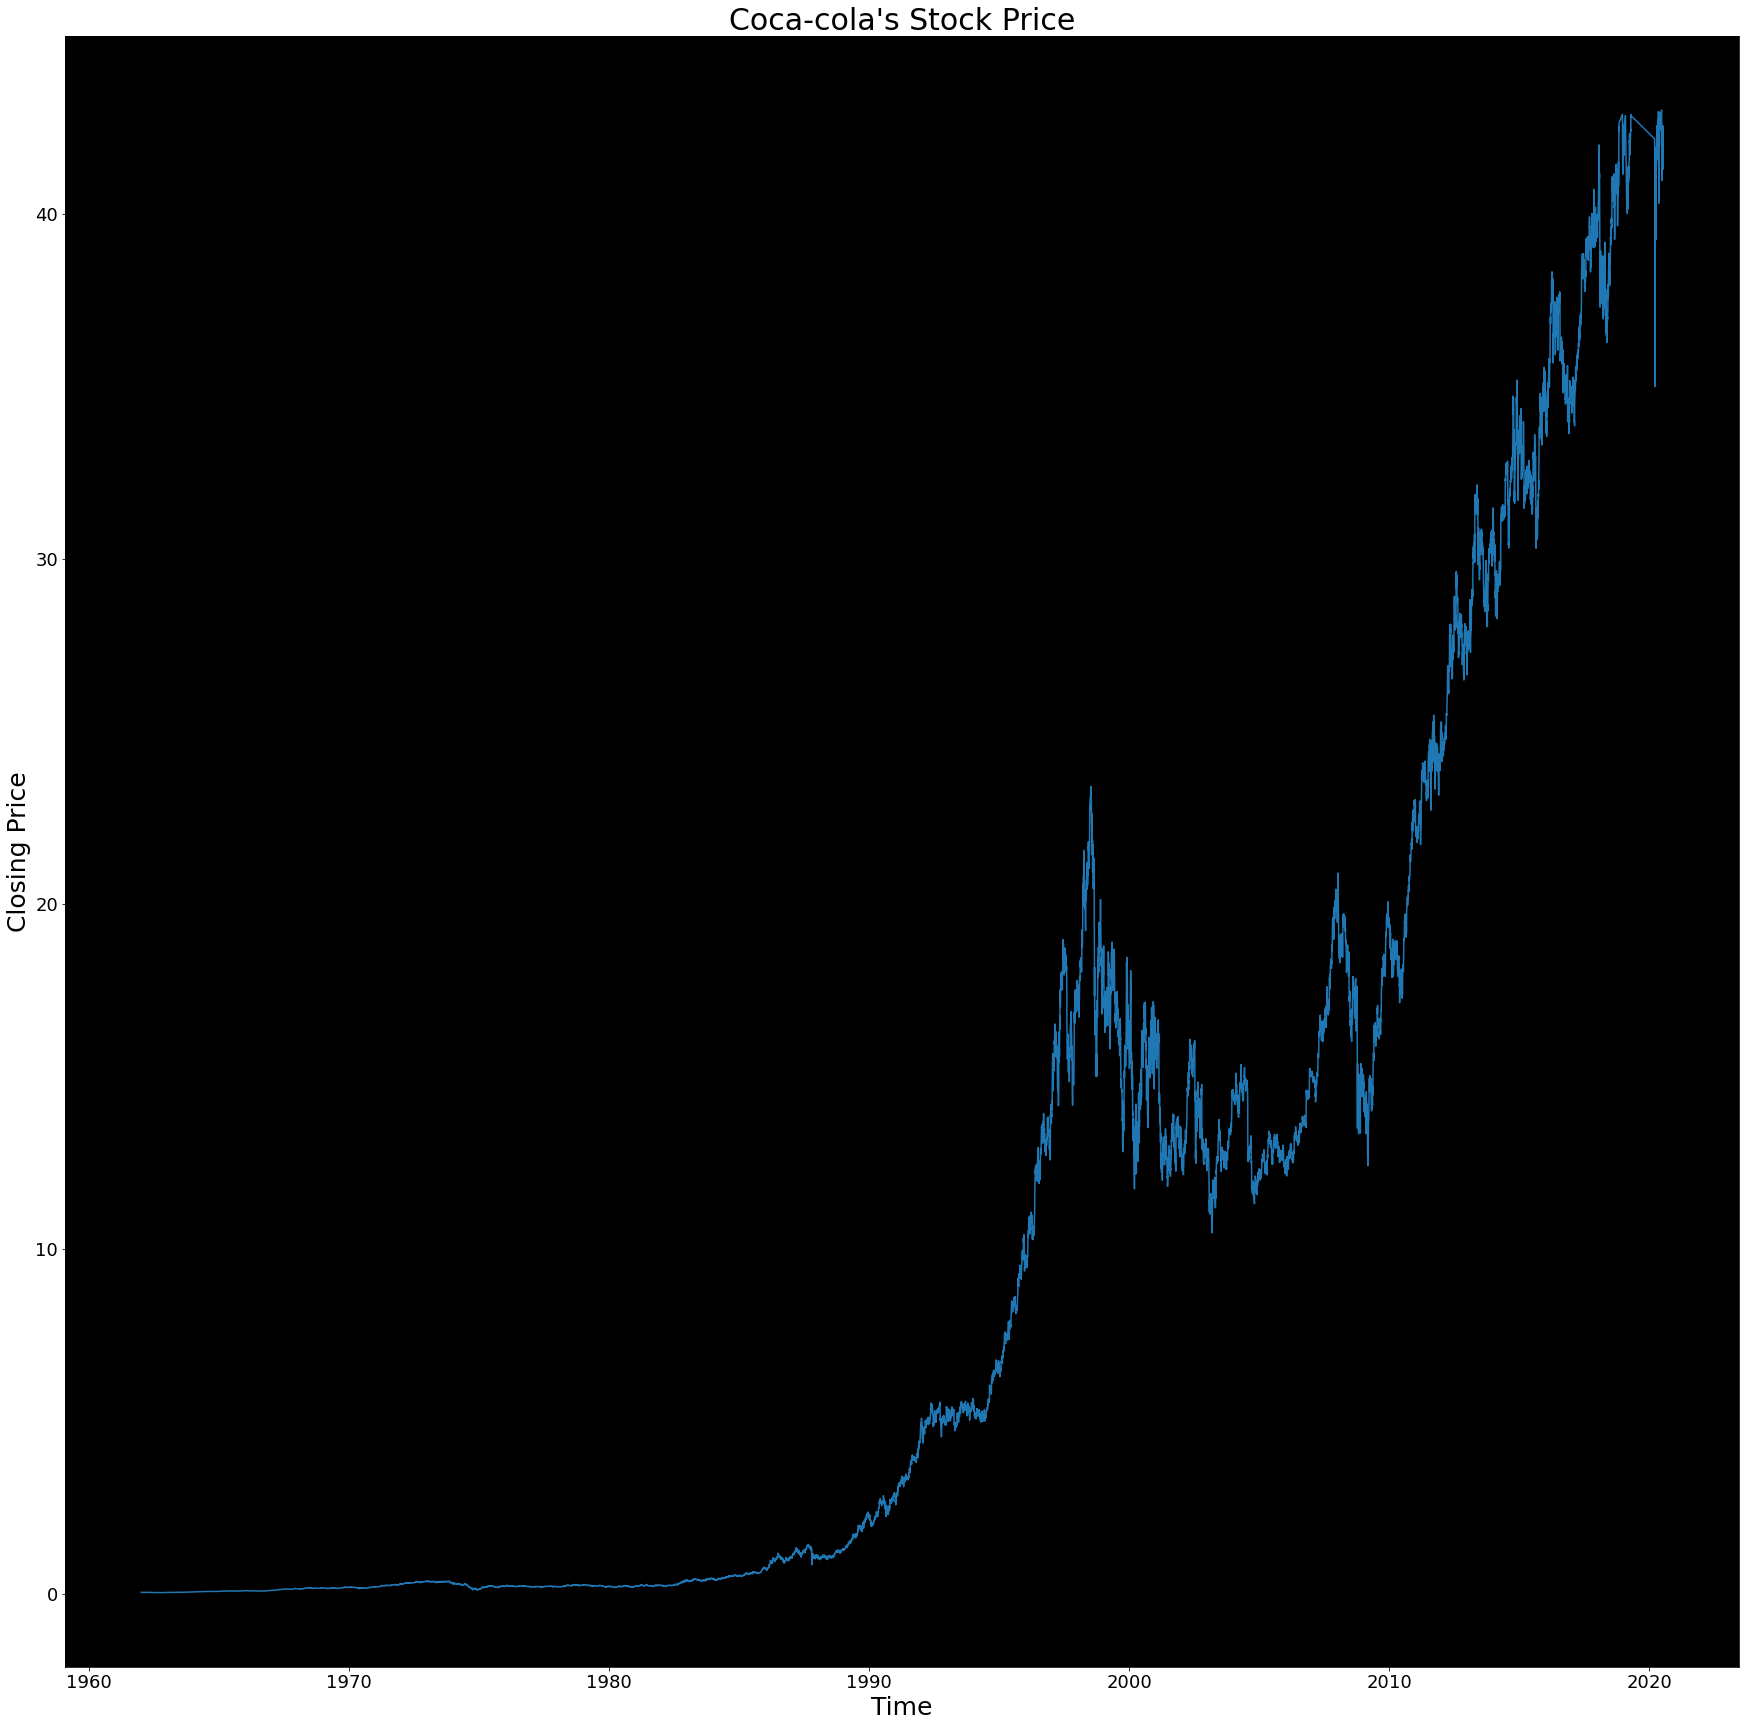

In [147]:
visualize_KO_stock_prices(dfR)

In [86]:
pip install mplfinance


Note: you may need to restart the kernel to use updated packages.


In [142]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpdates
def visualize_KO_candlestick_charts(df):

    candlestick_chart_data = ['Date', 'Open', 'High', 'Low', 'Close']

    new_df = df[candlestick_chart_data]
    new_df['Date'] = new_df['Date'].map(mpdates.date2num)
    fig, axes = plt.subplots(1, 1, figsize = (30, 30))

    axes.set_facecolor('black')
    date_format = mpdates.DateFormatter('%Y')
    axes.xaxis.set_major_formatter(date_format)
    candlestick_ohlc(axes, new_df.values, colorup = '#0000FF', colordown = '#FFFF00', alpha = 0.8)
    axes.set_title('Candlestick Chart for KO', fontsize = 30)
    axes.set_xlabel('Time', fontsize = 25)
    axes.set_ylabel('Price', fontsize = 25)
    axes.xaxis.set_tick_params(labelsize = 18)
    axes.yaxis.set_tick_params(labelsize = 18)
    
    plt.show()

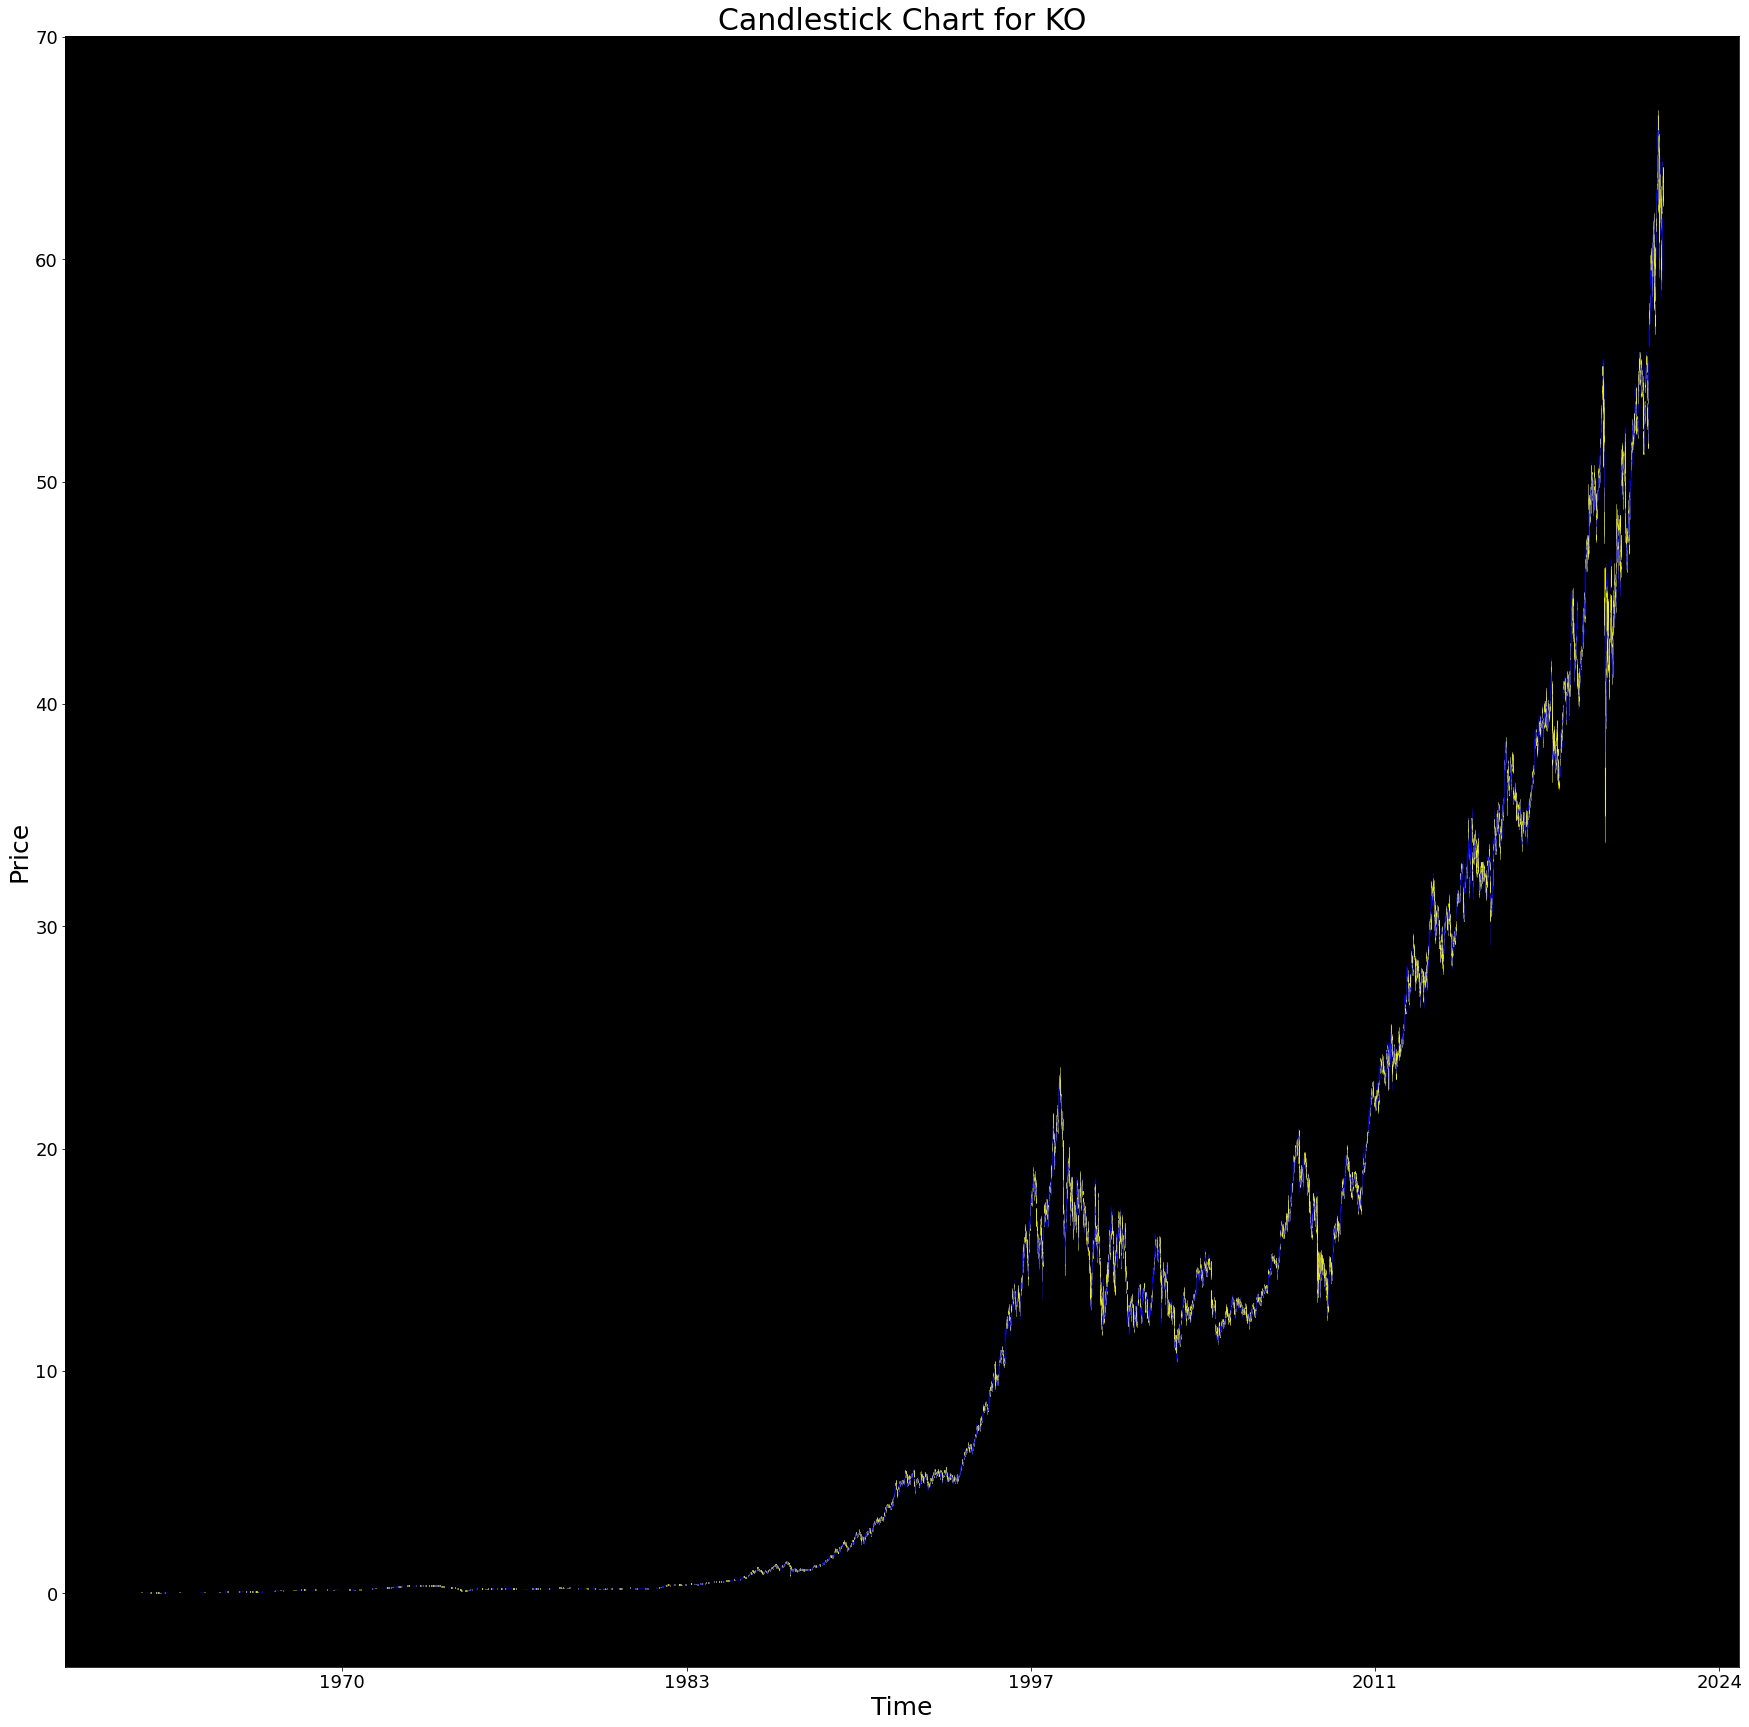

In [143]:
visualize_KO_candlestick_charts(df)

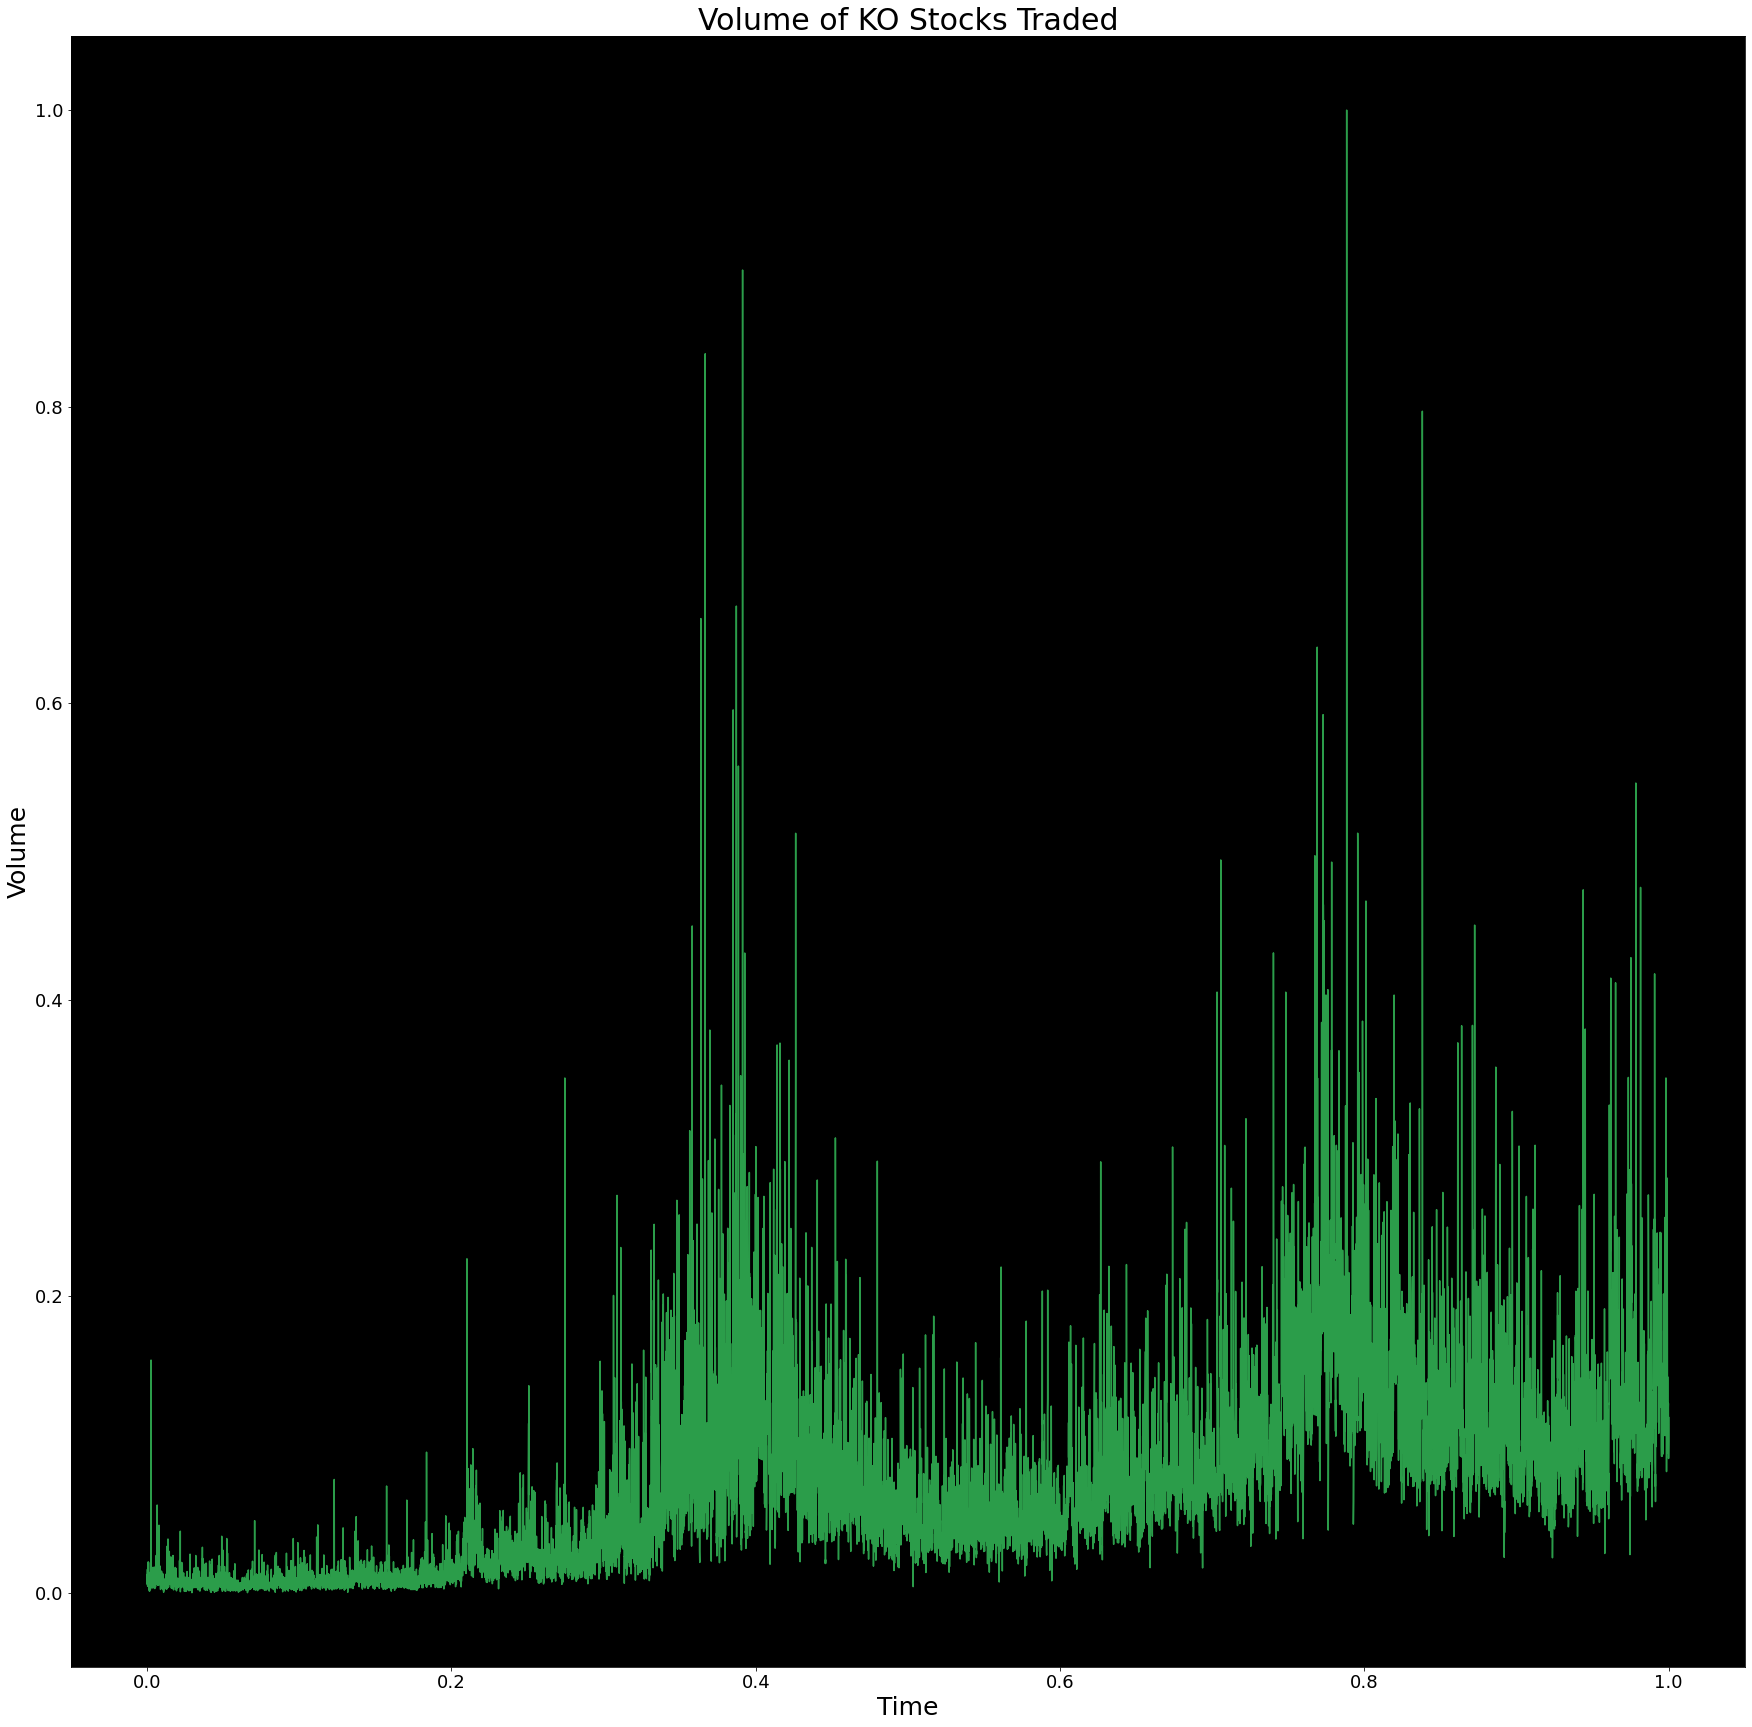

In [131]:
def visualize_KO_stock_volume(df):

    fig, axes = plt.subplots(1, 1, figsize = (30, 30))
  


    axes.set_facecolor('black')
    axes.plot(df_norm['Date'], df_norm['Volume'], color = '#2B9D4A')
    axes.set_title("Volume of KO Stocks Traded", fontsize = 30)
    axes.set_xlabel('Time', fontsize = 25)
    axes.set_ylabel('Volume', fontsize = 25)
    axes.xaxis.set_tick_params(labelsize = 18)
    axes.yaxis.set_tick_params(labelsize = 18)

    plt.show()
    
visualize_KO_stock_volume(df)

In [125]:
def visualize_moving_averages(df, time, feature, ma1, ma2, ma3):

    fig, axes = plt.subplots(1, 1, figsize = (30, 30))

    plt.suptitle('Moving Averages for 10, 50 and 100 Days', verticalalignment = 'top', horizontalalignment = 'center', fontsize = 35)

    axes.set_facecolor('black')
    axes.plot(df[time], df[feature], label = feature)
    axes.plot(df[time], df[ma1], label = ma1)
    axes.plot(df[time], df[ma2], label = ma2)
    axes.plot(df[time], df[ma3], label = ma3)
    axes.set_title('KO', fontsize = 30)
    axes.set_xlabel('Time', fontsize = 25)
    axes.set_ylabel('Price', fontsize = 25)
    axes.xaxis.set_tick_params(labelsize = 18)
    axes.yaxis.set_tick_params(labelsize = 18)
    axes.legend(loc = 'upper left', fontsize = 13)
    
    plt.subplots_adjust(top = 0.93)
    plt.show()

KeyError: 'MA for 10 days'

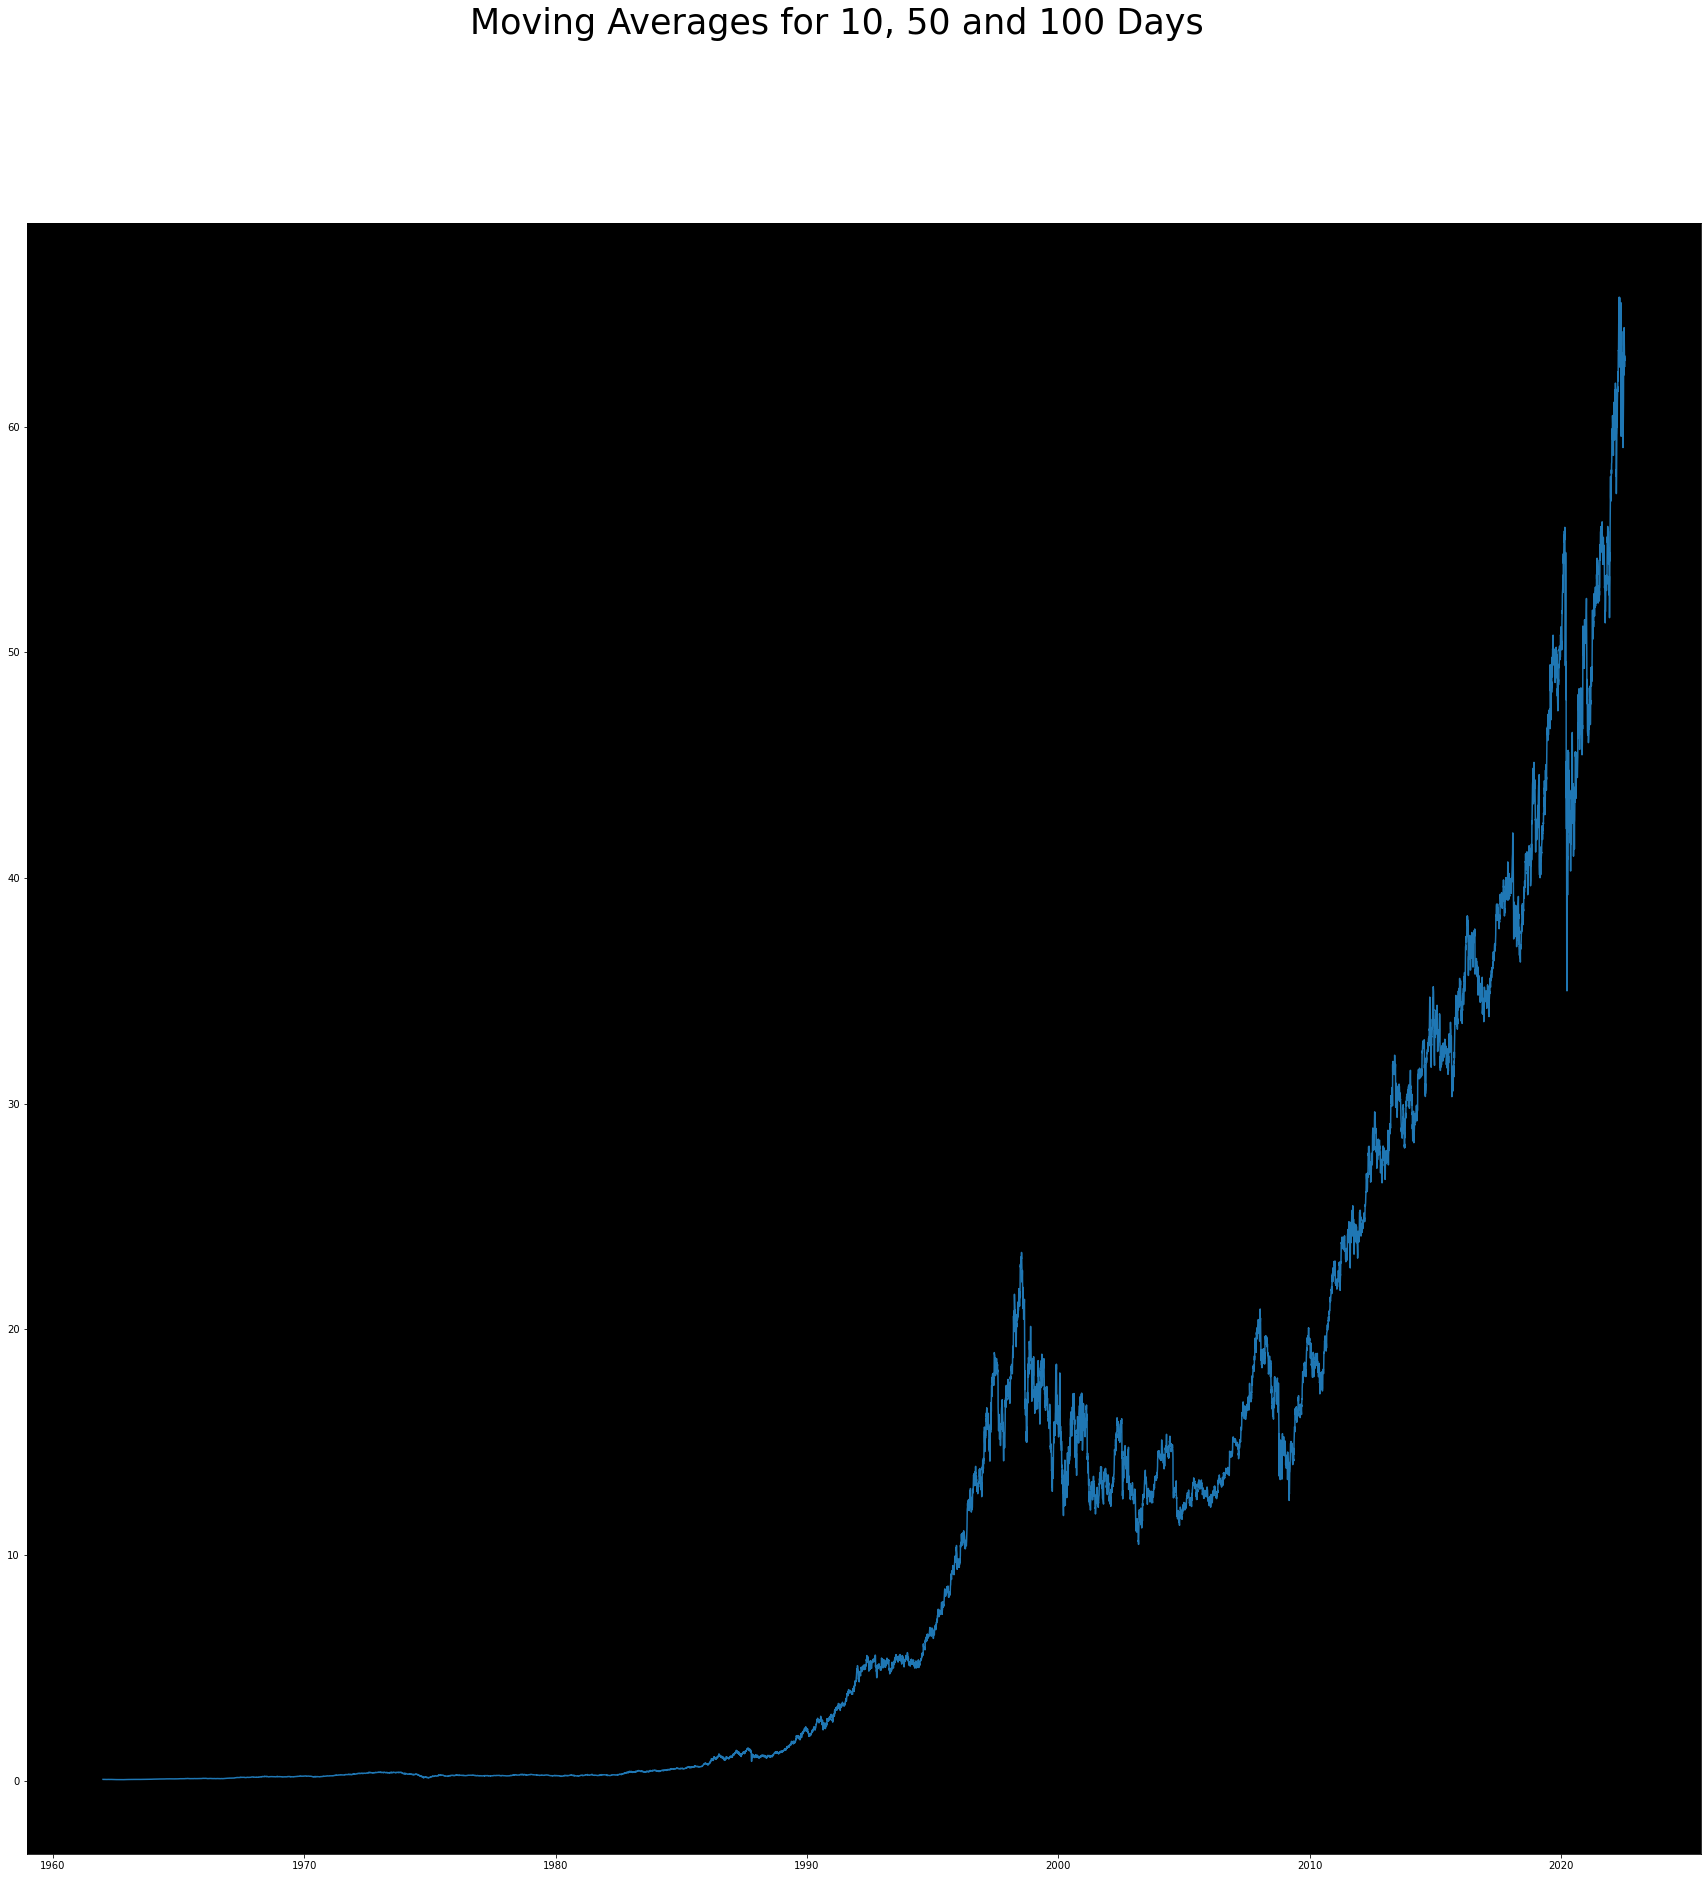

In [126]:
visualize_moving_averages(df, 'Date', 'Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days')

In [99]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [152]:
df_train = dfR.iloc[:int(len(dfR)*0.7)]
df_test = dfR.iloc[int(len(dfR)*0.7):]


print("Total data length after slicing: ", len(dfR))
print("Train data length: ", len(df_train))
print("Test data length: ", len(df_test))

Total data length after slicing:  14437
Train data length:  10105
Test data length:  4332


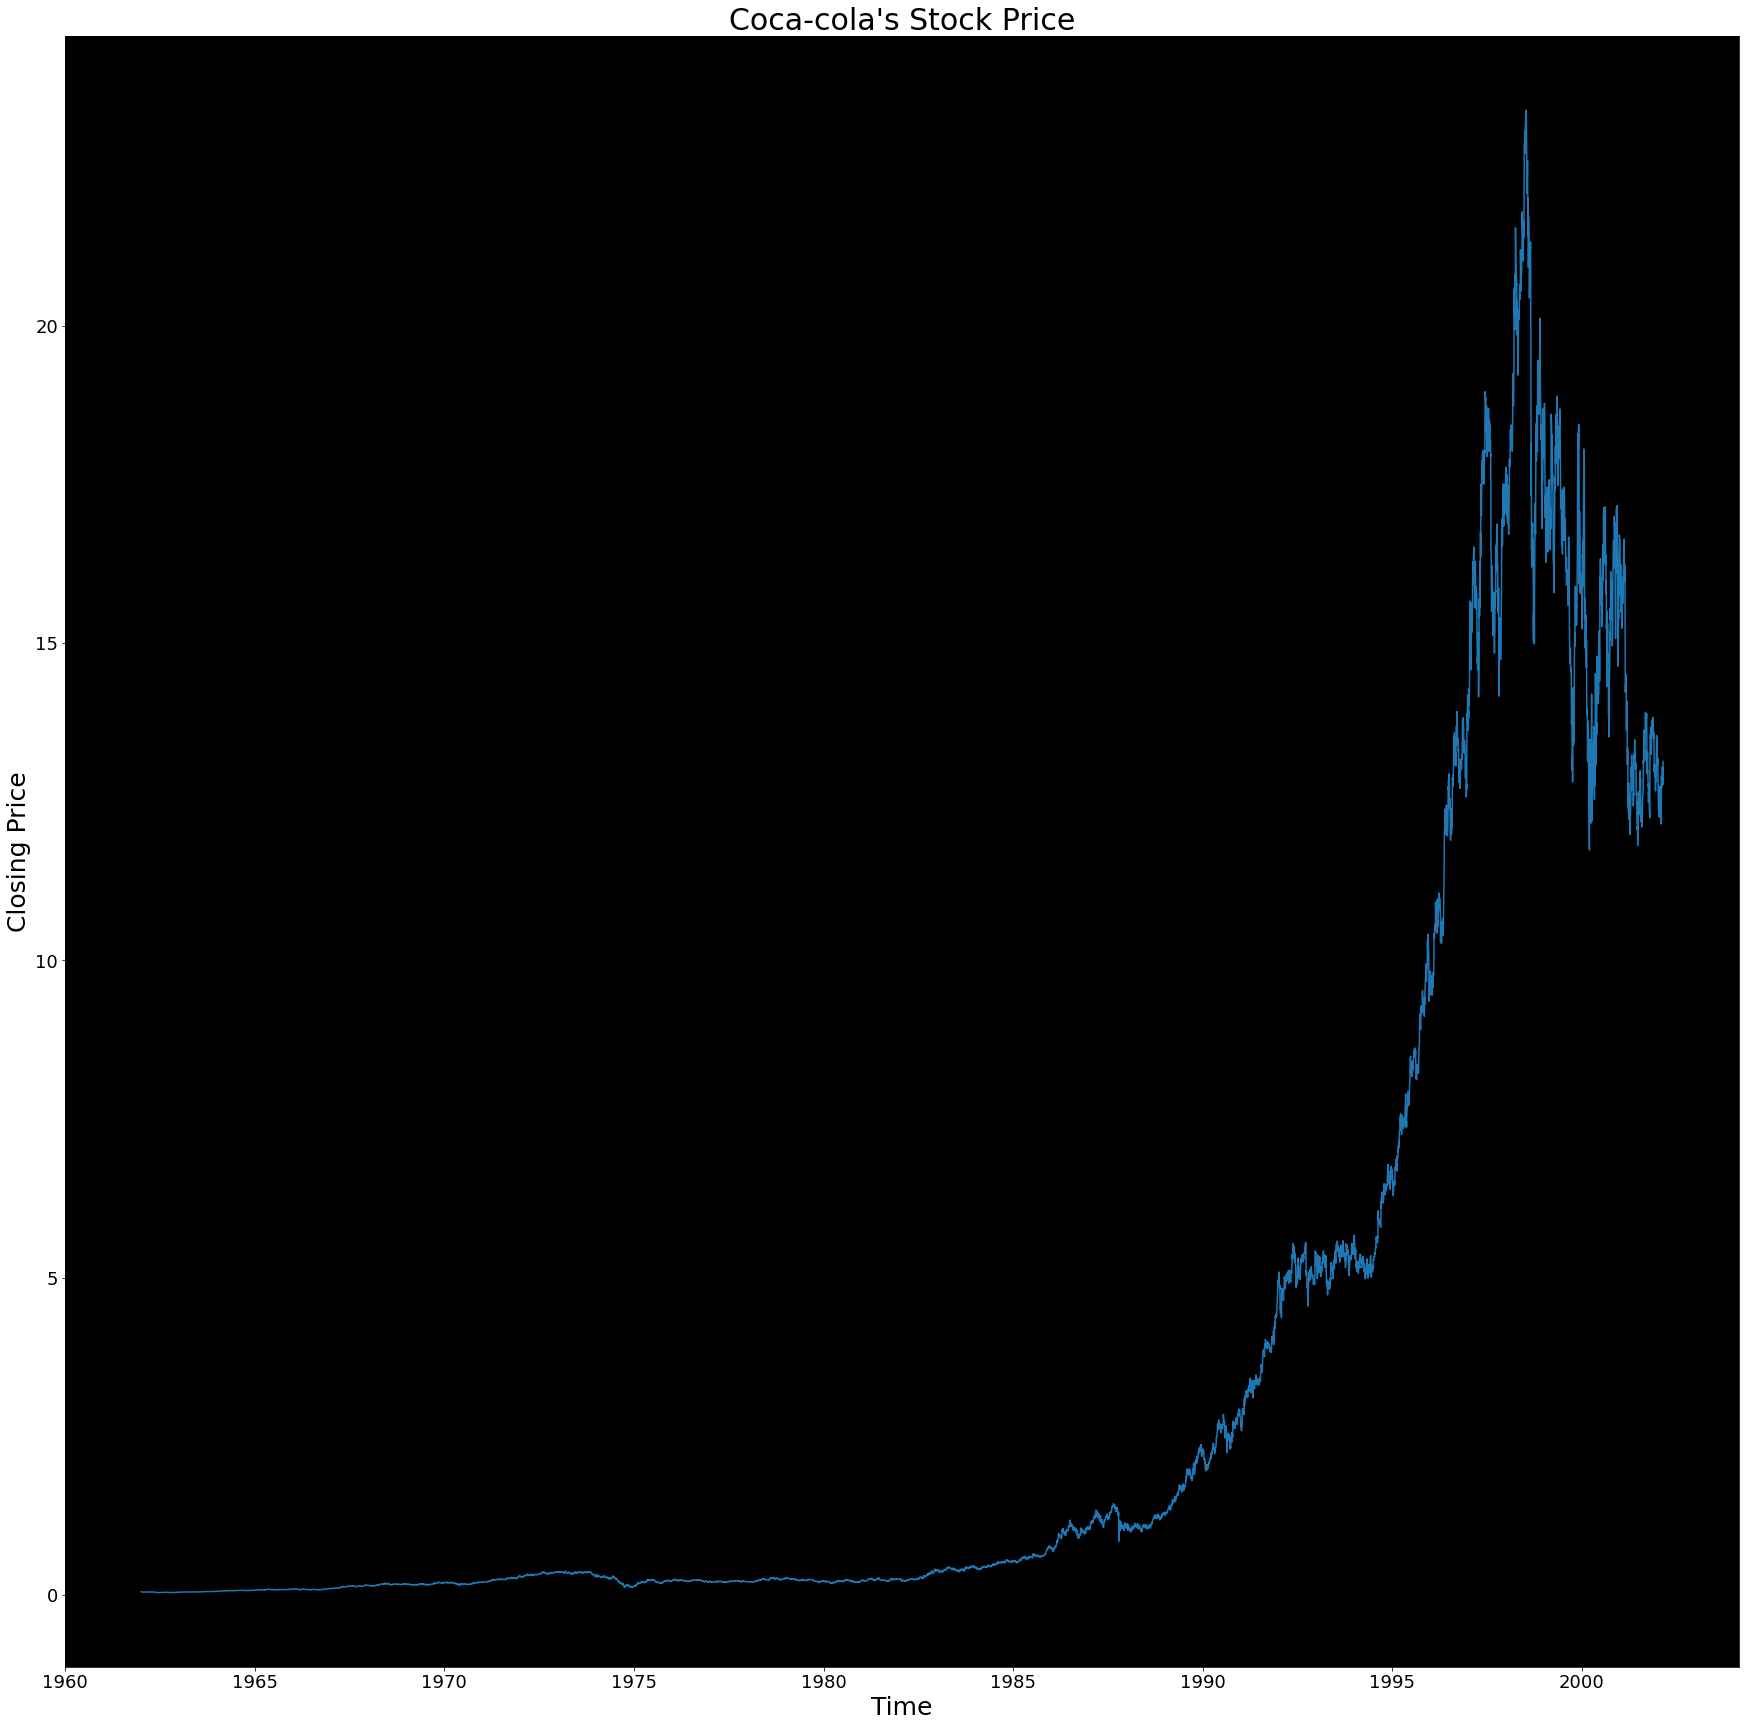

In [151]:
visualize_KO_stock_prices(df_train)

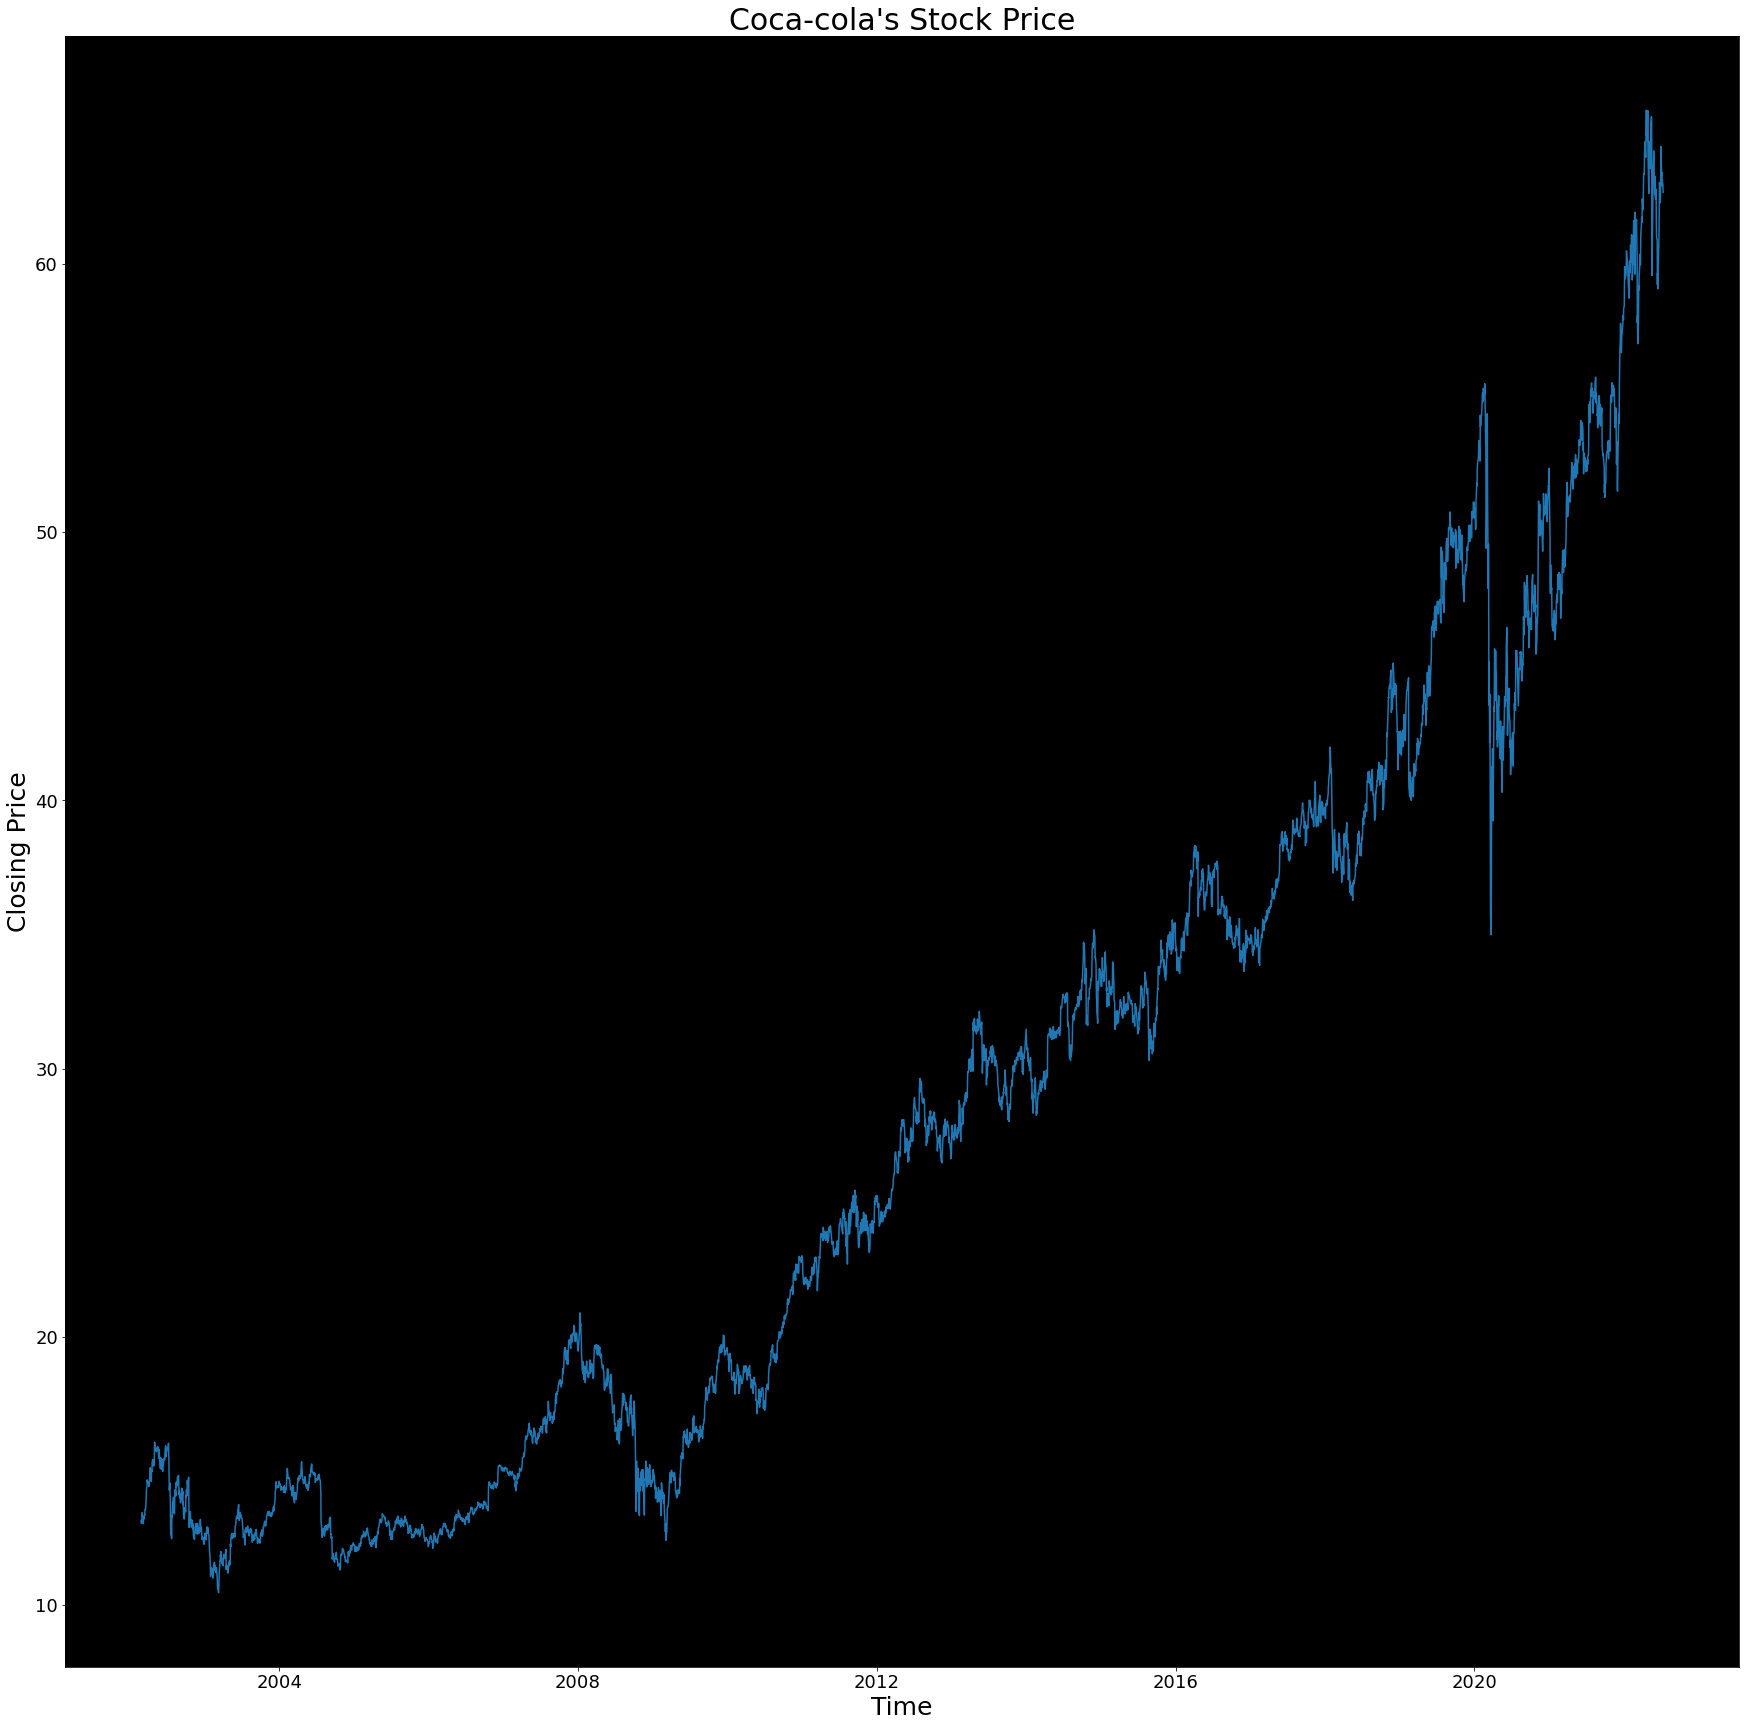

In [133]:
visualize_KO_stock_prices(df_test)